<a href="https://colab.research.google.com/github/Snehal2425/hello-world/blob/main/myproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title**

Customer Behavior Analysis & Prediction System

**Business Problem**

A wholesale distributor wants to understand customer purchasing behabior and:



*   Predict whether a customer belongs to the **Hotel** or **Retail** segment.
*   Identify hidden customer segments for targeted marketing.

You are hired as a **Data Scientist** to build an end-to-end ML solution.



**Project Tasks**

**Part A - Data Understanding**

In [31]:
#import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error,r2_score,mean_absolute_error,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.exceptions import ConvergenceWarning


1. Load the Dataset and display basic information

In [32]:
from google.colab import files
uploaded=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


In [33]:
# Load dataset
df = pd.read_csv("Wholesale customers data.csv")
print(df.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


**2. Identify:**
     

*   Features
*   Target variable





In [34]:
#create average total spend
df['Total_Spend'] = df[['Fresh','Milk','Grocery','Frozen',
                        'Detergents_Paper','Delicassen']].sum(axis=1)
df['Avg_Spend'] = df['Total_Spend'] / 6


In [35]:
#log transformation
df['Log_Total_Spend'] = np.log1p(df['Total_Spend'])
df['Log_Grocery'] = np.log1p(df['Grocery'])


In [36]:
#Interaction feature
df['Total_Spend'] = df[['Fresh','Milk','Grocery','Frozen',
                        'Detergents_Paper','Delicassen']].sum(axis=1)

df['Essential_Spend'] = df[['Milk','Grocery','Detergents_Paper']].sum(axis=1)
df['Luxury_Spend'] = df[['Fresh','Frozen','Delicassen']].sum(axis=1)

df['Essential_Ratio'] = df['Essential_Spend'] / df['Total_Spend']
df['Luxury_Ratio'] = df['Luxury_Spend'] / df['Total_Spend']


In [37]:
#categorical encoding
df_encoded=pd.get_dummies(df,columns=["Region"])
df_encoded


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Avg_Spend,Log_Total_Spend,Log_Grocery,Essential_Spend,Luxury_Spend,Essential_Ratio,Luxury_Ratio,Region_1,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,34112,5685.333333,10.437434,8.930891,19891,14221,0.583109,0.416891,False,False,True
1,2,7057,9810,9568,1762,3293,1776,33266,5544.333333,10.412321,9.166284,22671,10595,0.681507,0.318493,False,False,True
2,2,6353,8808,7684,2405,3516,7844,36610,6101.666667,10.508104,8.947026,20008,16602,0.546517,0.453483,False,False,True
3,1,13265,1196,4221,6404,507,1788,27381,4563.500000,10.217641,8.348064,5924,21457,0.216354,0.783646,False,False,True
4,2,22615,5410,7198,3915,1777,5185,46100,7683.333333,10.738590,8.881697,14385,31715,0.312039,0.687961,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,73302,12217.000000,11.202357,9.682092,28260,45042,0.385528,0.614472,False,False,True
436,1,39228,1431,764,4510,93,2346,48372,8062.000000,10.786697,6.639876,2288,46084,0.047300,0.952700,False,False,True
437,2,14531,15488,30243,437,14841,1867,77407,12901.166667,11.256845,10.317053,60572,16835,0.782513,0.217487,False,False,True
438,1,10290,1981,2232,1038,168,2125,17834,2972.333333,9.788918,7.711101,4381,13453,0.245654,0.754346,False,False,True


In [38]:
#Scaling and normalization
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[ 1.44865163e+00,  5.90668285e-01,  5.29331898e-02, ...,
        -1.46932656e-01,  4.03965238e-01, -4.03965238e-01],
       [ 1.44865163e+00,  5.90668285e-01, -3.91301970e-01, ...,
        -3.71156305e-01,  7.59837624e-01, -7.59837624e-01],
       [ 1.44865163e+00,  5.90668285e-01, -4.47029261e-01, ...,
         3.03004931e-04,  2.71627148e-01, -2.71627148e-01],
       ...,
       [ 1.44865163e+00,  5.90668285e-01,  2.00325540e-01, ...,
         1.47111986e-02,  1.12514409e+00, -1.12514409e+00],
       [-6.90297086e-01,  5.90668285e-01, -1.35383889e-01, ...,
        -1.94424042e-01, -8.16492124e-01,  8.16492124e-01],
       [-6.90297086e-01,  5.90668285e-01, -7.29306983e-01, ...,
        -8.46750372e-01,  5.27771866e-01, -5.27771866e-01]])

In [39]:
#polynomial engineering
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_scaled)


In [40]:
#separate X and y
X = df.drop('Channel', axis=1)
y = df['Channel']


3. Explain the difference between supervised and unsupervised learning using this dataset

"""

**Supervised Learning:**


*   We use **'Channel'** as the traget
*   Example: Predict **Hotel** or **Retail** customer

**Unsupervised Learning:**


*   No target variable used
*   Example: Customer segmentation using KMeans
"""





**Part B - Data Preprocessing & Feature Engineering**

4. create at least 3 new meaningful features from existing columns.

In [41]:
#1. Total customer spending
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

#2. fresh prduct dependency ratio
df['Fresh_Dependency_Ratio'] = df['Fresh'] / df['Total_Spend']

#3. Grocery to milk spending behavior
df['Grocery_to_Milk_Ratio'] = df['Grocery'] / df['Milk']

#new features

df[['Total_Spend', 'Fresh_Dependency_Ratio', 'Grocery_to_Milk_Ratio']].head()

,Total_Spend,Fresh_Dependency_Ratio,Grocery_to_Milk_Ratio
0,34112,0.371394,0.783036
1,33266,0.212139,0.975331
2,36610,0.173532,0.872389
3,27381,0.484460,3.529264
4,46100,0.490564,1.330499


**5. Perform:**


*   Outlier detection
*   Scaling of numerical features

*   Encoding if required








In [42]:
#Outliers
numeric_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df[numeric_cols] > (Q3 + 1.5 * IQR)))


outlier_count = outliers.sum()
print(outlier_count)



Channel                    0
Region                     0
Fresh                     20
Milk                      28
Grocery                   24
Frozen                    43
Detergents_Paper          30
Delicassen                27
Total_Spend               20
Avg_Spend                 20
Log_Total_Spend           15
Log_Grocery                2
Essential_Spend           27
Luxury_Spend              20
Essential_Ratio            0
Luxury_Ratio               0
Fresh_Dependency_Ratio     0
Grocery_to_Milk_Ratio     35
dtype: int64


In [43]:
#scaling on numerical data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Channel', axis=1))

6. Analyze multicollinearity using correlation or VIF.

In [44]:
#VIf
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]
vif["features"] = df.drop('Channel', axis=1).columns
vif


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.012373,Region
1,inf,Fresh
2,inf,Milk
3,inf,Grocery
4,inf,Frozen
5,inf,Detergents_Paper
6,inf,Delicassen
7,inf,Total_Spend
8,inf,Avg_Spend
9,5.990212,Log_Total_Spend


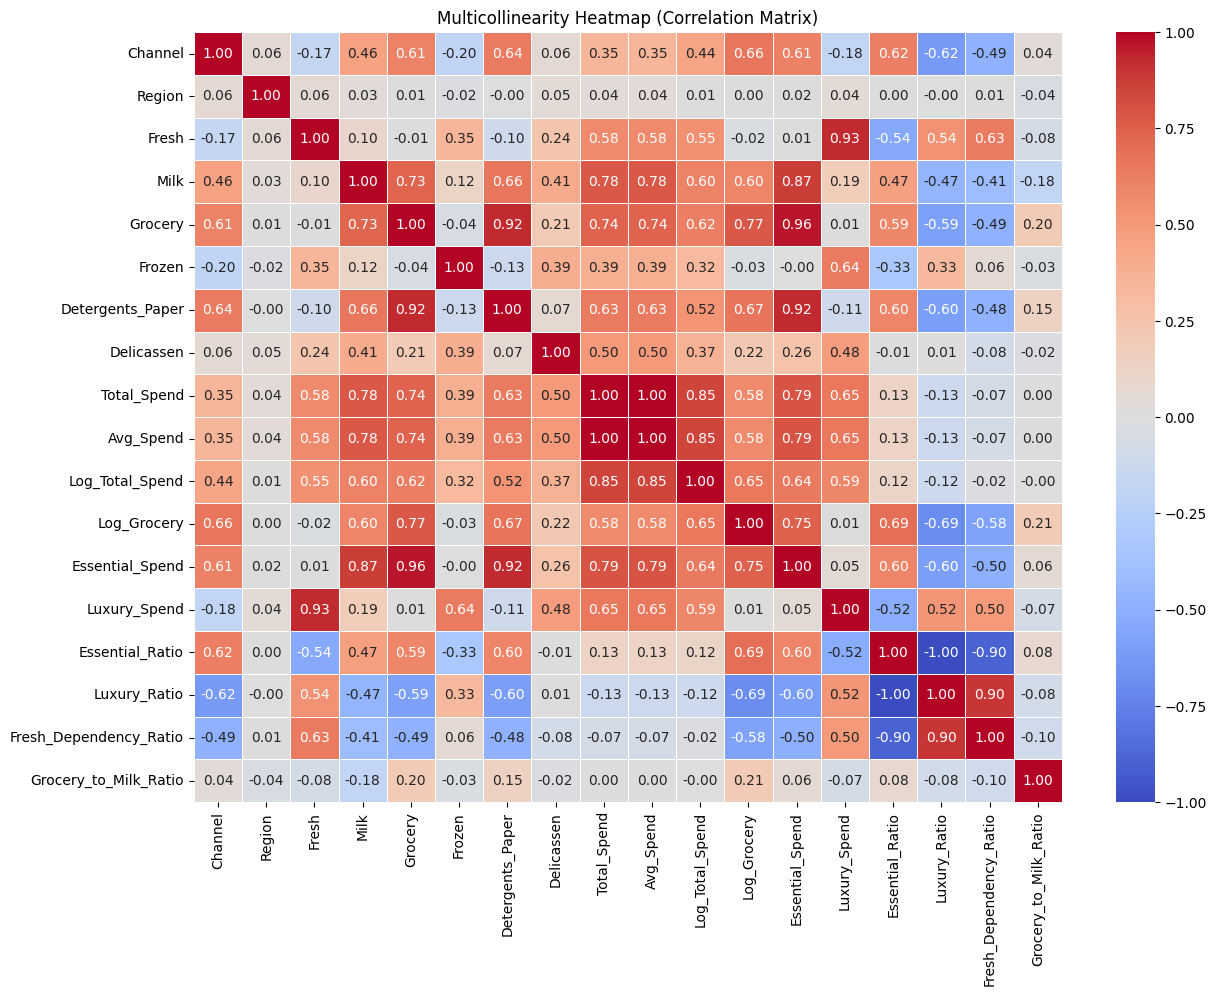

In [45]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Multicollinearity Heatmap (Correlation Matrix)")
plt.show()

**Part - C Regression Analysis**

7. Create a new target variable Total_Spend.

In [46]:

#create a new target variable
y = df['Total_Spend']
X = df.drop(['Total_Spend','Channel'], axis=1)



8. Build:


*   Linear Regression
*   Multiple Regression



In [47]:
#test and train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [48]:
#predict the data
y_pred = lr.predict(X_test)

**9. Evaluate:**


*   MAE
*   RMSE

*   R² score






In [49]:
#Evaluate using MAE,RMSE,R2 score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 3.1883990397380497e-12
RMSE: 5.002455744397057e-12
R2: 1.0


10. Apply Ridge or Lasso and compare performance.

In [50]:
#Apply Ridge or Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

**Part D - Classification Modeling**

11. Predict Customer Channel using:


*   Logistic Regression
*   Support Vector Machine

*   Decision Tree
*   Random Forest

*   Gradient Boosting






In [51]:
# Target variable (Customer Channel)
y = df['Channel']   # 1 = Horeca (Hotel/Restaurant/Cafe), 2 = Retail

# Convert to binary (required for ROC)
y = y.map({1: 0, 2: 1})

# Feature variables
X = df.drop(columns=['Channel', 'Region'])


In [52]:
LogisticRegression(max_iter=500)


LogisticRegression(max_iter=500)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


12. Compare models using:



*   Accuracy
*   Precision

*   Recall
*   F1-Score

*   ROC-AUC Curve







In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


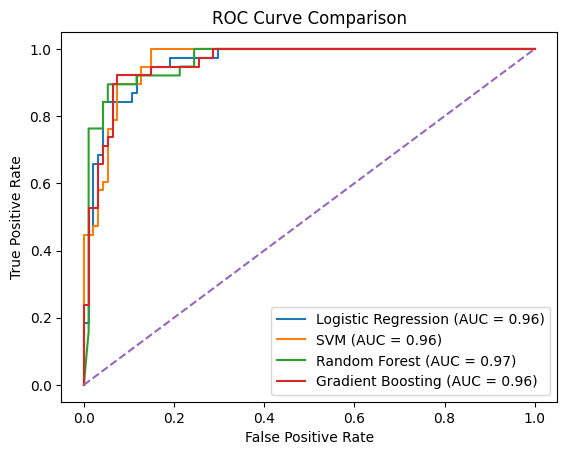

In [55]:
plt.figure()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [56]:
#Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(precision_score(y_test, pred))
    print(recall_score(y_test, pred))
    print(f1_score(y_test, pred))
    print(roc_auc_score(y_test, pred))
    print(r2_score(y_test, pred))
    print(mean_absolute_error(y_test, pred))
    print(mean_squared_error(y_test, pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9242424242424242
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        94
           1       0.89      0.84      0.86        38

    accuracy                           0.92       132
   macro avg       0.91      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132

[[90  4]
 [ 6 32]]
0.8888888888888888
0.8421052631578947
0.8648648648648649
0.8997760358342666
0.6304591265397537
0.07575757575757576
0.07575757575757576
SVM 0.8863636363636364
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.81      0.79      0.80        38

    accuracy                           0.89       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.89      0.89      0.89       132

[[87  7]
 [ 8 30]]
0.8108108108108109
0.7894736842105263
0.8
0.8575027995520716
0.4456886898096306
0.11363636363636363
0.113636363

**Part-E Unsuppervised Learning**



*   Apply K-Means Clustering to segment customers.
*   Use PCA to reduce dimensions and visualize clusters.







In [57]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_features)

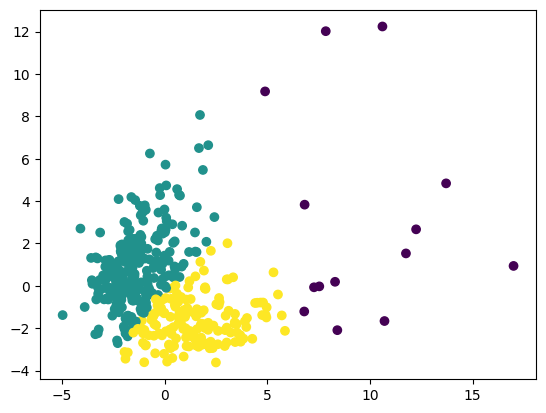

In [58]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'])
plt.show()

**Part-F Model Evaluation & Insights**


**16. Explain:**


*   Overfitting vs Underfitting
*   Train vs Validation behavior

*   Impact of feature scaling
*   Importance of handling class imbalance







**Overfitting** and **underfitting** describe how well a model learns patterns from data; underfitting occurs when the model is too simple to capture customer purchasing behavior, resulting in poor performance on both training and testing data, while overfitting happens when the model becomes too complex and learns noise, showing high training accuracy but reduced test performance. In this project, train versus validation behavior showed similar performance on both datasets, indicating good generalization and minimal overfitting. Feature scaling had a significant impact on model performance, especially for Logistic Regression, SVM, and K-Means clustering, because the dataset contains features with very different ranges; scaling improved model convergence, stability, and overall accuracy. Additionally, handling class imbalance was important because the dataset contains mode retail customers than hotel customers; using stratified sampling and evaluation metrics such as ROC-AUC, precision, and recall ensured that the models did not favor the majority class and were able to correctly classify both customer types effictively.